Importing necessary libraries/packages

In [1]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import normalize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading word map file
df = pd.read_csv("/content/drive/MyDrive/PA4/words.map.txt",header=None, sep = "\t")
df.columns=["Words"]
df.head()

,Words
0,archive
1,name
2,atheism
3,resources
4,alt


In [4]:
def read_words(filename):
  with open(filename) as wordmap:
    count=0
    data=[0]
    row=[0]
    col=[len(df)-1]
    y=[]

    for line in wordmap:
      items = line.split(' ')                                                                # Split each line into a list of words seperated by a space. 
      label, features = items[0], items[1:]                                                  # Read the very first element and the remaining ones as strings.
        
       
      yA = [float(label)]
      colA = [i.split(':', 1)[0] for i in items[1:]]
      colA = [int(x) - 1 for x in colA]
      dataA = [i.split(':', 1)[1] for i in items[1:]]
      dataA = [float(x) for x in dataA]
      rowA = [count]*(len(colA))
      col = col + colA
      data = data + dataA
      row = row + rowA
      y = y + yA
      count += 1
      
    #print(col)
    #print(row)
    #print(data)
    y = np.array(y)
    X = (csr_matrix((data, (row, col))))
    #print(X)
    #print(y)

    

    return X,y

In [5]:
def train_hmc(xd_train, xd_test, yd_train, yd_test):
  model = svm.SVC(kernel='linear', C=1E10, probability=True)
  model.fit(xd_train, yd_train)
  train_errors = (1 - model.score(xd_train, yd_train))
  test_errors = (1 - model.score(xd_test, yd_test))
  yhat_pred = model.predict(xd_test)
  print("HMC Complete")
  return train_errors, test_errors, yhat_pred, model

In [6]:
def train_smc_c(xd_train, xd_test, yd_train, yd_test, slack):
  model = svm.SVC(kernel='linear', C=slack, probability=True)
  model.fit(xd_train, yd_train)
  train_errors = (1 - model.score(xd_train, yd_train))
  test_errors = (1 - model.score(xd_test, yd_test))
  yhat_pred = model.predict(xd_test)
  #print("SMC Complete$$")
  return train_errors, test_errors, yhat_pred

In [7]:
 def train_smc_d(xd_train, xd_test, yd_train, yd_test, slack):
  model = svm.SVC(kernel='linear', C=slack, probability=True)
  model.fit(xd_train, yd_train)
  train_errors = (1 - model.score(xd_train, yd_train))
  test_errors = (1 - model.score(xd_test, yd_test))
  yhat_pred = model.predict(xd_test)
  #print("SMC Complete$$")
  return train_errors, test_errors, yhat_pred, model

In [8]:
#Splitting the training dataset 
def holdout_datasplit(x,y):
  Xhd_train, Xhd_test, Yhd_train, Yhd_test = train_test_split(x, y, test_size=0.25, random_state=100)
  return Xhd_train, Xhd_test, Yhd_train, Yhd_test

In [9]:
def smc_call_func(x,y):
  smc_train_errors = {}
  smc_test_errors = {}
  smc_yhat = {}
  x_train, x_test, y_train, y_test = holdout_datasplit(x,y)
  c = 0.125
  while c < 513:
    smc_train, smc_test, smc_pred = train_smc(x_train, x_test, y_train, y_test, c)    
    smc_train_errors.update({c:smc_train})
    smc_test_errors.update({c:smc_test})
    smc_yhat.update({c:smc_pred})
    c = c + c

  print("SMC Complete")
  return smc_train_errors, smc_test_errors, smc_yhat

In [10]:
#SMC function for question (c)
def smc_call_func_c(x,y):
  smc_train_errors = {}
  smc_test_errors = {}
  smc_yhat = {}
  x_train, x_test, y_train, y_test = holdout_datasplit(x,y)
  c = 0.125
  while c < 513:
    smc_train, smc_test, smc_pred = train_smc_c(x_train, x_test, y_train, y_test, c)    
    smc_train_errors.update({c:smc_train})
    smc_test_errors.update({c:smc_test})
    smc_yhat.update({c:smc_pred})
    c = c + c

  print("SMC Complete")
  return smc_train_errors, smc_test_errors, smc_yhat

In [11]:
#SMC function for question (d)
def smc_call_func_d(x,y):
  smc_train_errors = {}
  smc_test_errors = {}
  smc_yhat = {}
  x_train, x_test, y_train, y_test = holdout_datasplit(x,y)
  c = 0.125
  while c < 513:
    smc_train, smc_test, smc_pred = train_smc_d(x_train, x_test, y_train, y_test, c)    
    smc_train_errors.update({c:smc_train})
    smc_test_errors.update({c:smc_test})
    smc_yhat.update({c:smc_pred})
    c = c + c

  print("SMC Complete")
  return smc_train_errors, smc_test_errors, smc_yhat

In [12]:
def normalized_vector(x_train,x_test):
  normX_train = normalize(x_train, norm='l2', axis=1, copy=True, return_norm=False)
  normX_test = normalize(x_test, norm='l2', axis=1, copy=True, return_norm=False)
  return normX_train,normX_test

In [13]:
def filter_csr(filename,l1,l2):
  with open(filename) as wordmap:
    count=0
    col=[len(df)-1]
    row=[0]
    data=[0]
    y=[]
    for line in wordmap:
      # Split your line into a list of words deliminated by the space.
      elements = line.split(' ')
      if int(elements[0]) in (l1,l2):
        label, features = elements[0], elements[1:]
        yA = [float(label)]
        colA = [i.split(':', 1)[0] for i in elements[1:]]
        colA = [int(x) - 1 for x in colA]
        dataA = [i.split(':', 1)[1] for i in elements[1:]]
        dataA = [float(x) for x in dataA]
        rowA = [count]*(len(colA))
        col = col + colA
        data = data + dataA
        row = row + rowA
        y = y + yA
        count += 1

    y = np.array(y)
    X = (csr_matrix((data, (row, col))))

    return X,y

**Question(a)** 
Load the data.

In [14]:

trainX,trainy=read_words('/content/drive/MyDrive/PA4/articles.train')
testX, testy = read_words('/content/drive/MyDrive/PA4/articles.test')

Words_Map = pd.read_csv("/content/drive/MyDrive/PA4/words.map.txt", sep = "\t", header=None, names=["Words"])   
np.array(Words_Map)
print("\n")
print ('Question a')

print('Loading data with sklearn...')

from sklearn.datasets import load_svmlight_file                                               #load with existing function
X_train, y_train = load_svmlight_file("/content/drive/MyDrive/PA4/articles.train")            #to load datasets in the svmlight format into CSR sparse matrix.       
X_test, y_test = load_svmlight_file("/content/drive/MyDrive/PA4/articles.test")
X_train.resize((X_train.shape[0], Words_Map.shape[0]))
X_test.resize((X_test.shape[0], Words_Map.shape[0]))

if np.array_equal(trainX.todense(), X_train.todense()):                                       #comparing shape and elements of both arrays to cross-check
  print("Question a complete")
else:
  print("Failed")

dense_trainX = trainX
dense_testX = testX





Question a
Loading data with sklearn...
Question a complete


**Question(b)** First, train four different (hard-margin) linear classifiers. As SVM classifies only binary
labels, you have to replace the target class number to 1 and all others to -1 before calling
the library function. For instance, if you try to classify whether or not politics, you are to
use 1,000 articles about politics as positive samples and 3,000 others as negative samples
for training. Once you learn the four classifiers, the output label of each test example x
is determined by the following formula:
hw,b(x) = argmaxk∈{1,2,3,4}
(w(k)
T
x + b
(k)
)
where w(k)
is the learned weight vector, and b
(k)
is the biased term for the class k. If the
prediction hw,b(x) is different from the ground-truth class, it yields an error. Report the
training and test errors of four classifiers, respectively

In [15]:
#Replacing target class numbers
trainy_os = np.array([1 if y==1 else -1 for y in trainy])
testy_os = np.array([1 if y==1 else -1 for y in testy])

trainy_v = np.array([1 if y==2 else -1 for y in trainy])
testy_v = np.array([1 if y==2 else -1 for y in testy])

trainy_sp = np.array([1 if y==3 else -1 for y in trainy])
testy_sp = np.array([1 if y==3 else -1 for y in testy])

trainy_pol = np.array([1 if y==4 else -1 for y in trainy])
testy_pol = np.array([1 if y==4 else -1 for y in testy])


print ('Question (b) ')
hmc_train_err_os, hmc_test_err_os, hmc_yhat_os, p1 = train_hmc(dense_trainX, dense_testX, trainy_os, testy_os)
hmc_train_err_v, hmc_test_err_v, hmc_yhat_v, p2 = train_hmc(dense_trainX, dense_testX, trainy_v, testy_v)
hmc_train_err_sp, hmc_test_err_sp, hmc_yhat_sp, p3 = train_hmc(dense_trainX, dense_testX, trainy_sp, testy_sp)
hmc_train_err_pol, hmc_test_err_pol, hmc_yhat_pol, p4 = train_hmc(dense_trainX, dense_testX, trainy_pol, testy_pol)

pred_prob1 = p1.predict_proba(dense_testX)[:,1]
pred_prob2 = p2.predict_proba(dense_testX)[:,1]
pred_prob3 = p3.predict_proba(dense_testX)[:,1]
pred_prob4 = p4.predict_proba(dense_testX)[:,1]
#print(len(pred_prob1))
fin_pred = np.concatenate((pred_prob1.reshape((2400,1)), pred_prob2.reshape((2400,1)), pred_prob3.reshape((2400,1)), pred_prob4.reshape((2400,1))), axis=1)
fin_pred = np.argmax(fin_pred, axis=1)+1

fin_err = 1 - accuracy_score(fin_pred,testy)
  
# Hard-Margin Errors for each 1-vs-All Models
print("\n")
print("Hard-Margin Training and Test Errors for each classifier")
print("\n")
print('Hard-Margin training error - Operating Systems: ',hmc_train_err_os)
print('Hard-Margin training error - Vehicles: ',hmc_train_err_v)
print('Hard-Margin training error - Sports: ',hmc_train_err_sp)
print('Hard-Margin training error - Politics: ',hmc_train_err_pol)
print("\n")
print('Hard-Margin test error - Operating Systems: ',hmc_test_err_os)
print('Hard-Margin test error - Vehicles: ',hmc_test_err_v)
print('Hard-Margin test error - Sports: ',hmc_test_err_sp)
print('Hard-Margin test error - Politics: ',hmc_test_err_pol)
print("\n")
print("Hard-Margin training error for overall model (Qa)", fin_err)
print("Question (b) complete")


Question (b) 
HMC Complete
HMC Complete
HMC Complete
HMC Complete


Hard-Margin Training and Test Errors for each classifier


Hard-Margin training error - Operating Systems:  0.0
Hard-Margin training error - Vehicles:  0.0
Hard-Margin training error - Sports:  0.0
Hard-Margin training error - Politics:  0.0


Hard-Margin test error - Operating Systems:  0.04208333333333336
Hard-Margin test error - Vehicles:  0.0658333333333333
Hard-Margin test error - Sports:  0.050833333333333286
Hard-Margin test error - Politics:  0.0591666666666667


Hard-Margin training error for overall model (Qa) 0.09666666666666668
Question (b) complete


**Question (c)**  Now you are to train soft-margin linear classifers with di erent C values from f0.125,
0.25, 0.5, 1, 2, 4, 8, ... , 256, 512g. In order to pick the best C value, you are required to
perform a hold-out validation: 1. Split the entire training data randomly into 75% for training and 25% for validation.
2. For each C value, learn four binary classifers similar to part (a) but only on the
training data.
3. Measure the overall classifcation error on the validation data.
4. Pick the C with the lowest validation error.


In [16]:
#Learning 4 binary classifiers for every c value
print("\n")
smc_train_errors_os, smc_test_errors_os, smc_yhat_os = smc_call_func_c(dense_trainX, trainy_os)
smc_train_errors_v, smc_test_errors_v, smc_yhat_v = smc_call_func_c(dense_trainX, trainy_v)
smc_train_errors_sp, smc_test_errors_sp, smc_yhat_sp = smc_call_func_c(dense_trainX, trainy_sp)
smc_train_errors_pol, smc_test_errors_pol, smc_yhat_pol = smc_call_func_c(dense_trainX, trainy_pol)

# Plot soft margin training error
c_values = np.array([0.125, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0])
xaxis_logc = np.log2(c_values) 

# Calculating the average error on the validation data
print("\n")
print('*'*85)
print("Soft-Margin SVM Validation Error at different C values:")
print('\n')
validation_error = {}
for c in c_values:
  validation_error.update({c:(smc_test_errors_os[c]+smc_test_errors_v[c]+smc_test_errors_sp[c]+smc_test_errors_pol[c])/4})
  print('Soft-Margin Validation error at C = ',c,'is',validation_error[c])
  
print("\n")
best_c_value = min(validation_error, key=validation_error.get)
print("The validation error is lowest at C =", best_c_value)
print("\n")



SMC Complete
SMC Complete
SMC Complete
SMC Complete


*************************************************************************************
Soft-Margin SVM Validation Error at different C values:


Soft-Margin Validation error at C =  0.125 is 0.03500000000000003
Soft-Margin Validation error at C =  0.25 is 0.03550000000000003
Soft-Margin Validation error at C =  0.5 is 0.03675000000000003
Soft-Margin Validation error at C =  1.0 is 0.038000000000000034
Soft-Margin Validation error at C =  2.0 is 0.038500000000000034
Soft-Margin Validation error at C =  4.0 is 0.038500000000000034
Soft-Margin Validation error at C =  8.0 is 0.038500000000000034
Soft-Margin Validation error at C =  16.0 is 0.038500000000000034
Soft-Margin Validation error at C =  32.0 is 0.038500000000000034
Soft-Margin Validation error at C =  64.0 is 0.038500000000000034
Soft-Margin Validation error at C =  128.0 is 0.038500000000000034
Soft-Margin Validation error at C =  256.0 is 0.038500000000000034
Soft-Margin V

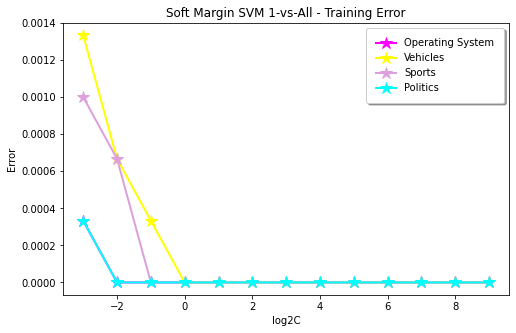

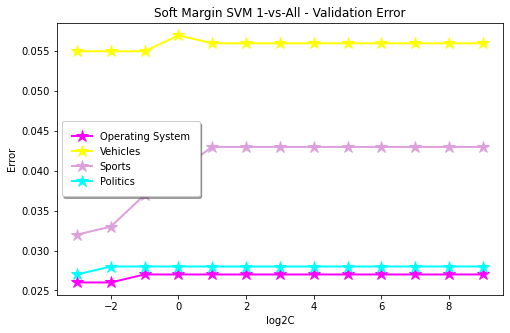

In [20]:
#Plot a graph showing both training and validation errors together with varying C in log-scale.
xaxis_logc = np.log2(c_values)
plt.figure(num = 3, figsize=(8, 5))
plt.plot( xaxis_logc, np.array(list(smc_train_errors_os.values())), marker='*', markerfacecolor='magenta', markersize=12, color='magenta', linewidth=2, label="Operating System")
plt.plot( xaxis_logc, np.array(list(smc_train_errors_v.values())), marker='*', markerfacecolor='yellow', markersize=12, color='yellow', linewidth=2, label="Vehicles")
plt.plot( xaxis_logc, np.array(list(smc_train_errors_sp.values())), marker='*', markerfacecolor='plum', markersize=12, color='plum', linewidth=2, label="Sports")
plt.plot( xaxis_logc, np.array(list(smc_train_errors_pol.values())), marker='*', markerfacecolor='cyan', markersize=12, color='cyan', linewidth=2, label="Politics")
plt.xlabel("log2C")
plt.ylabel("Error")
plt.title("Soft Margin SVM 1-vs-All - Training Error")
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

plt.figure(num = 3, figsize=(8, 5))
plt.plot( xaxis_logc, np.array(list(smc_test_errors_os.values())), marker='*', markerfacecolor='magenta', markersize=12, color='magenta', linewidth=2, label="Operating System")
plt.plot( xaxis_logc, np.array(list(smc_test_errors_v.values())), marker='*', markerfacecolor='yellow', markersize=12, color='yellow', linewidth=2, label="Vehicles")
plt.plot( xaxis_logc, np.array(list(smc_test_errors_sp.values())), marker='*', markerfacecolor='plum', markersize=12, color='plum', linewidth=2, label="Sports")
plt.plot( xaxis_logc, np.array(list(smc_test_errors_pol.values())), marker='*', markerfacecolor='cyan', markersize=12, color='cyan', linewidth=2, label="Politics")
plt.xlabel("log2C")
plt.ylabel("Error")
plt.title("Soft Margin SVM 1-vs-All - Validation Error")
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()


In [ ]:
type(smc_train_errors_os)

dict

**Question (d)** - With the best C value chosen from part (b), learn four soft-margin classi ers again on the
entire training set. (Note that your classi ers from part (b) used only 75% of the training
set for learning, holding out 25% for validation) Test your newly learned best classi ers on
the test set similar to part (a) where the output label is determined by the argmax class
given in the formula in part (a). Compare the test error rates to hard-margin classifiers
on part (a). Which classi er works better? Justify your observation.

In [21]:
print("Question (d)")
smc_trainmin_errors_os, smc_testmin_errors_os, smc_yhatmin_os,p11 = train_smc_d(dense_trainX, dense_testX, trainy_os, testy_os, best_c_value)
smc_trainmin_errors_v, smc_testmin_errors_v, smc_yhatmin_v,p12 = train_smc_d(dense_trainX, dense_testX, trainy_v, testy_v, best_c_value)
smc_trainmin_errors_sp, smc_testmin_errors_sp, smc_yhatmin_sp,p13 = train_smc_d(dense_trainX, dense_testX, trainy_sp, testy_sp, best_c_value)
smc_trainmin_errors_pol, smc_testmin_errors_pol, smc_yhatmin_pol,p14 = train_smc_d(dense_trainX, dense_testX, trainy_pol,testy_pol, best_c_value)

#using argmax
pred_prob1d = p11.predict_proba(dense_testX)[:,1]
pred_prob2d = p12.predict_proba(dense_testX)[:,1]
pred_prob3d = p13.predict_proba(dense_testX)[:,1]
pred_prob4d = p14.predict_proba(dense_testX)[:,1]
print(len(pred_prob1))
d_fin_pred = np.concatenate((pred_prob1d.reshape((2400,1)), pred_prob2d.reshape((2400,1)), pred_prob3d.reshape((2400,1)), pred_prob4d.reshape((2400,1))), axis=1)
d_fin_pred = np.argmax(d_fin_pred, axis=1)+1

fin_err_d = 1 - accuracy_score(d_fin_pred,testy)

print('\n')
print("Soft-Margin SVM Training and Test Errors")
print('\n')
print('Soft-Margin training error - Operating Systems at best C:  ', smc_trainmin_errors_os)
print('Soft-Margin training error - Vehicles at best C: ', smc_trainmin_errors_v)
print('Soft-Margin training error - Sports at best C: ', smc_trainmin_errors_sp)
print('Soft-Margin training error - Politics at best C: ', smc_trainmin_errors_pol)
print('\n')
print('Soft-Margin test error - Operating Systems at best C: ', smc_testmin_errors_os)
print('Soft-Margin test error - Vehicles at best C: ', smc_testmin_errors_v)
print('Soft-Margin test error - Sports at best C: ', smc_testmin_errors_sp)
print('Soft-Margin test error - Politics at best C: ', smc_testmin_errors_pol)
print("\n")



# Performance Comparison HMC vs SMC
print("Performance Comparison of Hard Margin vs Soft Margin Classifiers:")
print("\n")
  ## Hard-Margin Classifier Class Performance and Prediction:
hmc_yhat = list()
for i in range(len(testy_os)):
  if(hmc_yhat_os[i] > hmc_yhat_v[i] and hmc_yhat_os[i] > hmc_yhat_sp[i] and hmc_yhat_os[i] > hmc_yhat_pol[i]):
    hmc_yhat.append(1)
  elif(hmc_yhat_v[i] > hmc_yhat_os[i] and hmc_yhat_v[i] > hmc_yhat_sp[i] and hmc_yhat_v[i] > hmc_yhat_pol[i]):
    hmc_yhat.append(2)
  elif(hmc_yhat_sp[i] > hmc_yhat_os[i] and hmc_yhat_sp[i] > hmc_yhat_v[i] and hmc_yhat_sp[i] > hmc_yhat_pol[i]):
    hmc_yhat.append(3)
  else:
    hmc_yhat.append(4)
print("\n")
print("Classification Report for Hard-Margin SVM: ")
print("\n")
target_names = ['Operating Systems', 'Vehicles', 'Sports', 'Politics']
print(classification_report(y_test, hmc_yhat, target_names=target_names))
# Soft-Margin Classifier Class Performance and Prediction:
smc_yhat = list()
for i in range(len(testy_os)):
  if(smc_yhatmin_os[i] > smc_yhatmin_v[i] and smc_yhatmin_os[i] > smc_yhatmin_sp[i] and smc_yhatmin_os[i] > smc_yhatmin_pol[i]):
    smc_yhat.append(1)
  elif(smc_yhatmin_v[i] > smc_yhatmin_os[i] and smc_yhatmin_v[i] > smc_yhatmin_sp[i] and smc_yhatmin_v[i] > smc_yhatmin_pol[i]):
    smc_yhat.append(2)
  elif(smc_yhatmin_sp[i] > smc_yhatmin_os[i] and smc_yhatmin_sp[i] > smc_yhatmin_v[i] and smc_yhatmin_sp[i] > smc_yhatmin_pol[i]):
    smc_yhat.append(3)
  else:
    smc_yhat.append(4)
print("\n")
print("Classification Report for Soft-Margin SVM: ")
print("\n")
print(classification_report(y_test, smc_yhat, target_names=target_names))
print("\n")
print("Hard-Margin training error for overall model (Qa)", fin_err)
print("Soft-margin training error for overall model(Qd)-",fin_err_d)
print("\n")
print("If the data is linearly separable, hard margin classifiers perform better. But in our case, the data is not linearly separable.\n HMC mis-classifies data points that are close to the hyperplane. In the case of SMC, the data points close to the hyperplane are classified more accurately,\n therefore the error is less.")
print("\n")

print("Question (d) complete")


Question (d)
2400


Soft-Margin SVM Training and Test Errors


Soft-Margin training error - Operating Systems at best C:   0.00024999999999997247
Soft-Margin training error - Vehicles at best C:  0.0010000000000000009
Soft-Margin training error - Sports at best C:  0.0007500000000000284
Soft-Margin training error - Politics at best C:  0.00024999999999997247


Soft-Margin test error - Operating Systems at best C:  0.03833333333333333
Soft-Margin test error - Vehicles at best C:  0.053749999999999964
Soft-Margin test error - Sports at best C:  0.0345833333333333
Soft-Margin test error - Politics at best C:  0.05833333333333335


Performance Comparison of Hard Margin vs Soft Margin Classifiers:




Classification Report for Hard-Margin SVM: 


                   precision    recall  f1-score   support

Operating Systems       0.97      0.84      0.90       600
         Vehicles       0.95      0.81      0.88       600
           Sports       0.95      0.84      0.89       600
         Po

**Question (e)** For this problem, you will normalize feature vectors so that the feature vectors of each
example have unit length. For each example x = (x1; x2; :::; xn), divide every component
into kxk2 so that kxk2 = 1. Repeat the part (b) with normalized features and measure
the test error rates again with newly picked C value. Compare the new test error to previous test error from soft-margin classi er without normalization, and explain why normalization makes a difference.

In [22]:
print("Question (e)")
X_dense_trainNorm,X_dense_testNorm = normalized_vector(dense_trainX, dense_testX)

smc_train_errors_norm_os, smc_test_errors_norm_os, smc_yhat_norm_os = smc_call_func_c(X_dense_trainNorm, trainy_os)
smc_train_errors_norm_v, smc_test_errors_norm_v, smc_yhat_norm_v = smc_call_func_c(X_dense_trainNorm, trainy_v)
smc_train_errors_norm_sp, smc_test_errors_norm_sp, smc_yhat_norm_sp = smc_call_func_c(X_dense_trainNorm, trainy_sp)
smc_train_errors_norm_pol, smc_test_errors_norm_pol, smc_yhat_norm_pol = smc_call_func_c(X_dense_trainNorm, trainy_pol)
  
# Calculating the average error on the validation data

print('\n')
print("Normalized - Soft-Margin SVM Validation Error at different C values:")
print('\n')
validationErr_norm = {}
for c in c_values:
  validationErr_norm.update({c:(smc_test_errors_norm_os[c]+smc_test_errors_norm_v[c]+smc_test_errors_norm_sp[c]+smc_test_errors_norm_pol[c])/4})
  print('With Normalization - Soft-Margin Validation error at C = ',c,'is',validationErr_norm[c])
  
print("\n")
print("-"*85)
bestC_norm = min(validationErr_norm, key=validationErr_norm.get)
print("The validation error (With Normalization) is lowest  at C =", bestC_norm)
print("-"*85)
print("\n")

#Soft-Margin 1-vs-All Classifier at Best C

smc_trainminErr_norm_os, smc_testminErr_norm_os, smc_minyhat_norm_os = train_smc_c(X_dense_trainNorm, X_dense_testNorm, trainy_os, testy_os, bestC_norm)
smc_trainminErr_norm_v, smc_testminErr_norm_v, smc_minyhat_norm_v = train_smc_c(X_dense_trainNorm, X_dense_testNorm, trainy_v, testy_v, bestC_norm)
smc_trainminErr_norm_sp, smc_testminErr_norm_sp, smc_minyhat_norm_sp = train_smc_c(X_dense_trainNorm, X_dense_testNorm, trainy_sp, testy_sp, bestC_norm)
smc_trainminErr_norm_pol, smc_testminErr_norm_pol, smc_minyhat_norm_pol = train_smc_c(X_dense_trainNorm, X_dense_testNorm, trainy_pol, testy_pol, bestC_norm)
  

print('\n')
print("With Normalization- Soft-Margin SVM Training and Test Errors ")
print('\n')
print('SMC training error : Operating Systems at best C:  ', smc_trainminErr_norm_os)
print('SMC training error : Vehicles at best C: ', smc_trainminErr_norm_v)
print('SMC training error : Sports at best C: ', smc_trainminErr_norm_sp)
print('SMC training error : Politics at best C: ', smc_trainminErr_norm_pol)
print('\n')
print('SMC test error : Operating Systems at best C: ', smc_testminErr_norm_os)
print('SMC test error : Vehicles at best C: ', smc_testminErr_norm_v)
print('SMC test error : Sports at best C: ', smc_testminErr_norm_sp)
print('SMC test error : Politics at best C: ', smc_testminErr_norm_pol)
print("\n")


# Soft-Margin Classifier Class Prediction & Performance:
yhatSMC_Norm = list()
for i in range(len(testy_os)):
  if(smc_minyhat_norm_os[i] > smc_minyhat_norm_v[i] and smc_minyhat_norm_os[i] > smc_minyhat_norm_sp[i] and smc_minyhat_norm_os[i] > smc_minyhat_norm_pol[i]):
    yhatSMC_Norm.append(1)
  elif(smc_minyhat_norm_v[i] > smc_minyhat_norm_os[i] and smc_minyhat_norm_v[i] > smc_minyhat_norm_sp[i] and smc_minyhat_norm_v[i] > smc_minyhat_norm_pol[i]):
    yhatSMC_Norm.append(2)
  elif(smc_minyhat_norm_sp[i] > smc_minyhat_norm_os[i] and smc_minyhat_norm_sp[i] > smc_minyhat_norm_v[i] and smc_minyhat_norm_sp[i] > smc_minyhat_norm_pol[i]):
    yhatSMC_Norm.append(3)
  else:
    yhatSMC_Norm.append(4)

  
print("Soft-Margin SVM Classification Report: ")
print("\n")
print(classification_report(y_test, smc_yhat, target_names=target_names))
print("\n")
print("Soft-Margin SVM Classification Report (With Normalization): ")
print("\n")
print(classification_report(y_test, yhatSMC_Norm, target_names=target_names))
print("\n")
print("The test error of a soft margin binary classifier for class 4-vs-all with and without normalization at Best C ")
print("\nNormalization : Soft-Margin test error - Operating Systems :  0.032916666666666705")
print("Without Normalization : Soft-Margin test error - Operating Systems :  0.03833333333333333")
print("\nNormalization :  Soft-Margin test error - Vehicles at best C:  0.03416666666666668")
print("Without Normalization : Soft-Margin test error - Vehicles at best C:  0.053749999999999964")
print("\nNormalization : Soft-Margin test error - Sports at best C:  0.026249999999999996")
print("Without Normalization : Soft-Margin test error - Sports at best C:  0.0345833333333333")
print("\nNormalization : Soft-Margin test error - Politics at best C:  0.029166666666666674")
print("Without Normalization : Soft-Margin test error - Politics at best C:  0.05833333333333335")
print("\nSoft Margin classifiers with normalization performs better than without normalization, generating lower errors across all the classes.")
print("\nThe effect of some frequently occuring words such as 'the','on','a' are dampened so that the frequency of other terms occuring in the article are better displayed.")


Question (e)
SMC Complete
SMC Complete
SMC Complete
SMC Complete


Normalized - Soft-Margin SVM Validation Error at different C values:


With Normalization - Soft-Margin Validation error at C =  0.125 is 0.14325
With Normalization - Soft-Margin Validation error at C =  0.25 is 0.07674999999999998
With Normalization - Soft-Margin Validation error at C =  0.5 is 0.04375000000000001
With Normalization - Soft-Margin Validation error at C =  1.0 is 0.030000000000000027
With Normalization - Soft-Margin Validation error at C =  2.0 is 0.02100000000000002
With Normalization - Soft-Margin Validation error at C =  4.0 is 0.019000000000000017
With Normalization - Soft-Margin Validation error at C =  8.0 is 0.02075000000000002
With Normalization - Soft-Margin Validation error at C =  16.0 is 0.02100000000000002
With Normalization - Soft-Margin Validation error at C =  32.0 is 0.02100000000000002
With Normalization - Soft-Margin Validation error at C =  64.0 is 0.02100000000000002
With Normalizati

Question f

In [24]:
print ('Question (f): ')

trainX_12,trainy_12=filter_csr('/content/drive/MyDrive/PA4/articles.train',1,2)
trainX_13,trainy_13=filter_csr('/content/drive/MyDrive/PA4/articles.train',1,3)
trainX_14,trainy_14=filter_csr('/content/drive/MyDrive/PA4/articles.train',1,4)
trainX_23,trainy_23=filter_csr('/content/drive/MyDrive/PA4/articles.train',2,3)
trainX_24,trainy_24=filter_csr('/content/drive/MyDrive/PA4/articles.train',2,4)
trainX_34,trainy_34=filter_csr('/content/drive/MyDrive/PA4/articles.train',3,4)

y_train_12 = np.array([1 if y==1 else -1 for y in trainy_12])
y_train_13 = np.array([1 if y==1 else -1 for y in trainy_13])
y_train_14 = np.array([1 if y==1 else -1 for y in trainy_14])
y_train_23 = np.array([1 if y==2 else -1 for y in trainy_23])
y_train_24 = np.array([1 if y==2 else -1 for y in trainy_24])
y_train_34 = np.array([1 if y==3 else -1 for y in trainy_34])

trainX_12,trainX_23=normalized_vector(trainX_12,trainX_23)
trainX_13,trainX_24=normalized_vector(trainX_13,trainX_24)
trainX_14,trainX_34=normalized_vector(trainX_14,trainX_34)

model12 = svm.SVC(kernel='linear', C=4.0, decision_function_shape='ovo')
model12.fit(trainX_12, y_train_12)
yhat12 = model12.predict(testX)
model13 = svm.SVC(kernel='linear', C=4.0, decision_function_shape='ovo')
model13.fit(trainX_13, y_train_13)
yhat13 = model13.predict(testX)
model14 = svm.SVC(kernel='linear', C=4.0, decision_function_shape='ovo')
model14.fit(trainX_14, y_train_14)
yhat14 = model14.predict(testX)
model23 = svm.SVC(kernel='linear', C=4.0, decision_function_shape='ovo')
model23.fit(trainX_23, y_train_23)
yhat23 = model23.predict(testX)
model24 = svm.SVC(kernel='linear', C=4.0, decision_function_shape='ovo')
model24.fit(trainX_24, y_train_24)
yhat24 = model24.predict(testX)
model34 = svm.SVC(kernel='linear', C=4.0, decision_function_shape='ovo')
model34.fit(trainX_34, y_train_34)
yhat34 = model34.predict(testX)

mod_trainy_12 = np.array([1 if y==1 else 2 for y in yhat12])
mod_trainy_13 = np.array([1 if y==1 else 3 for y in yhat13])
mod_trainy_14 = np.array([1 if y==1 else 4 for y in yhat14])
mod_trainy_23 = np.array([2 if y==1 else 3 for y in yhat23])
mod_trainy_24 = np.array([2 if y==1 else 4 for y in yhat24])
mod_trainy_34 = np.array([3 if y==1 else 4 for y in yhat34])

yhat_array = np.array([mod_trainy_12,mod_trainy_13,mod_trainy_14,mod_trainy_23,mod_trainy_24,mod_trainy_34])

y_hat_df = pd.DataFrame(yhat_array)

y_hatOnetoOne=y_hat_df.mode().iloc[0].to_numpy(dtype='int64')

print("\n")
print("Soft-Margin OVO SVM Classification Report: ")
print("\n")
print(classification_report(y_test, y_hatOnetoOne, target_names=target_names))
print("One-vs-all multiclass classifier accuracy - 92%")
print("One-vs-One multiclass classifier accuracy - 91%")
print("\n")
print("Question (f) complete")

Question (f): 


Soft-Margin OVO SVM Classification Report: 


                   precision    recall  f1-score   support

Operating Systems       0.93      0.90      0.92       600
         Vehicles       0.95      0.86      0.90       600
           Sports       0.96      0.91      0.94       600
         Politics       0.81      0.96      0.88       600

         accuracy                           0.91      2400
        macro avg       0.92      0.91      0.91      2400
     weighted avg       0.92      0.91      0.91      2400

One-vs-all multiclass classifier accuracy - 92%
One-vs-One multiclass classifier accuracy - 91%


Question (f) complete
